# SD210 TP Bagging and Random Forests

### Part Ⅰ.  Bagging

#### 1)

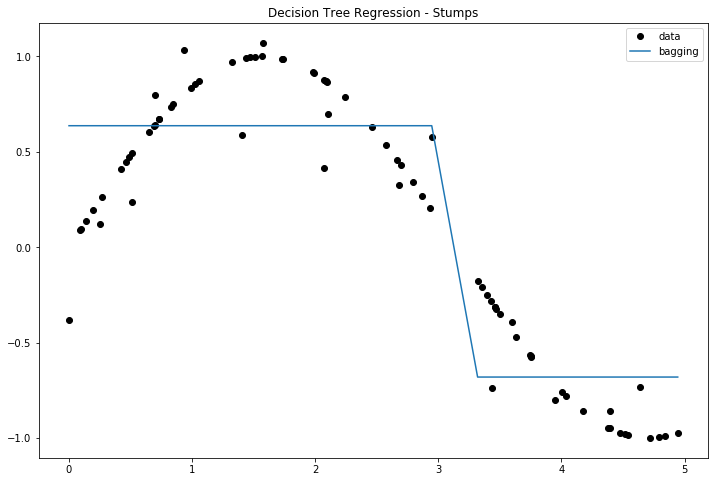

In [64]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
plt.close('all')
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0) #length:80
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators,
                           random_state=rng)
bagging.fit(X, y)

# Predict
y_tree = tree.predict(X)
y_bagging = bagging.predict(X)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X, y_bagging, label="bagging")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression - Stumps")
plt.legend(loc=1, numpoints=1)
plt.show()

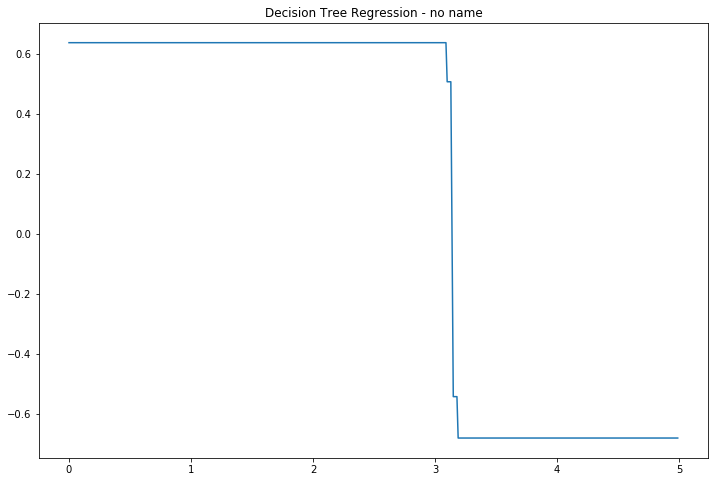

In [3]:
# 不知道自己在这里干了啥
plt.close('all')
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_bagging,label="bias")
plt.title("Decision Tree Regression - no name")
plt.show()

#### 2)

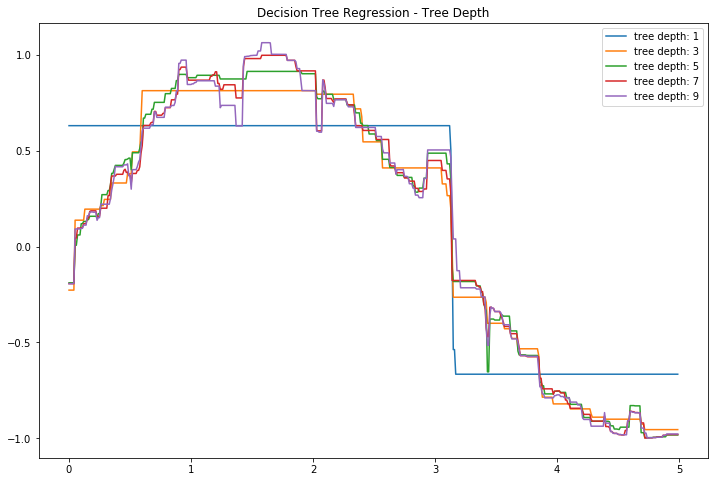

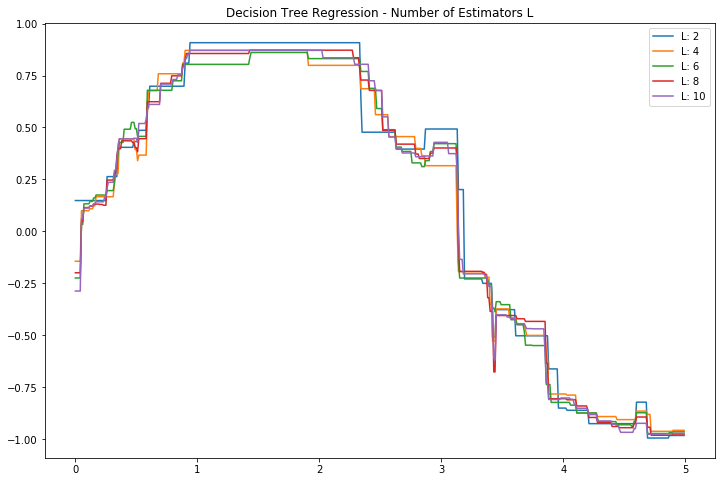

In [4]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# Tree Depth
plt.figure(figsize=(12, 8))
# plt.plot(X, y, 'o', c="k", label="data")
# TODO add plots for Bagging/Tree
for depth in range(1,tree_max_depth+1,2):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X,y)
    bagging = BaggingRegressor(base_estimator=tree,
                               n_estimators=n_estimators,
                               random_state=rng)
    bagging.fit(X,y)
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    plt.plot(X_test,y_bagging, label='tree depth: %d'%depth)
plt.title("Decision Tree Regression - Tree Depth")
plt.legend(loc=1, numpoints=1)
plt.show()

# Number of Estimators L
plt.figure(figsize=(12, 8))
# plt.plot(X, y, 'o', c="k", label="data")

for L in range(2,bagging_max_depth+1,2):
    tree = DecisionTreeRegressor(max_depth=4)
    tree.fit(X,y)
    bagging = BaggingRegressor(base_estimator=tree,
                               n_estimators=L,
                               random_state=rng)
    bagging.fit(X,y)
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    plt.plot(X_test,y_bagging, label='L: %d'%L)
plt.title("Decision Tree Regression - Number of Estimators L")
plt.legend(loc=1, numpoints=1)
plt.show()

#### 3)
To check that the estimators conputed with the decision trees are biased, the original data should be used to be compared with the predicted result with regard to the term "bias".

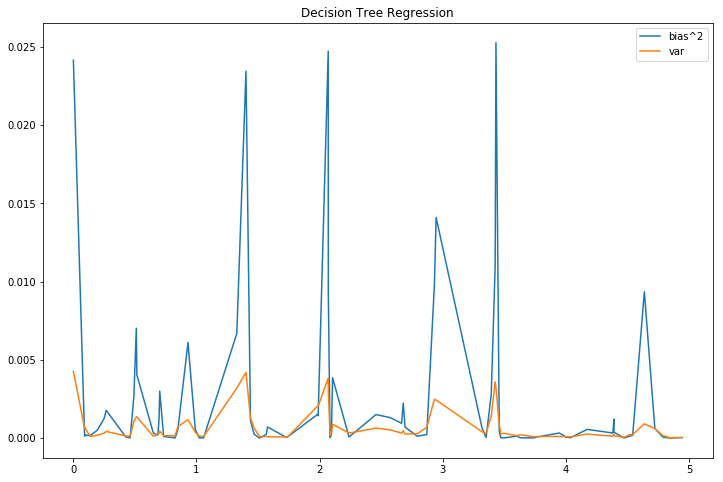

In [38]:
# To calculate the mean of the bias over 50 times of sampling 
n_repeat = 50 # Number of iterations for computing expectations
tree = DecisionTreeRegressor(max_depth=10)
y_predict = np.zeros((X.shape[0], n_repeat))
for i in range(n_repeat):
    tree.fit(X,y)
    bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators,
                           random_state=rng)
    bagging.fit(X, y)
    y_predict[:,i] = bagging.predict(X)
y_bias = (y - np.mean(y_predict, axis=1)) ** 2
y_var = np.var(y_predict, axis=1)

plt.close('all')
plt.figure(figsize=(12, 8))
# plt.plot(X, y, '.', c="k", label="data")
plt.plot(X, y_bias, label="bias^2")
plt.plot(X, y_var, label="var")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

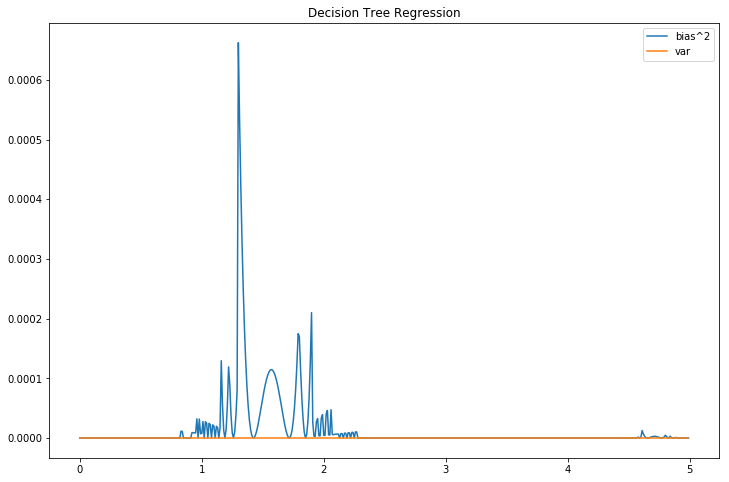

In [28]:
# # To generate y_test with regard of x
# # 不确定这里要用生成的正弦函数 还是 正弦函数+噪声
# y_test = np.sin(X_test).ravel()

# # To calculate the mean of the bias over 50 times of sampling 
# n_repeat = 50 # Number of iterations for computing expectations
# tree = DecisionTreeRegressor(max_depth=10)
# # bagging = BaggingRegressor(base_estimator=tree,
# #                            n_estimators=n_estimators,
# #                            random_state=rng)
# # bagging.fit(X, y)
# y_predict = np.zeros((X_test.shape[0], n_repeat))
# for i in range(n_repeat):
#     tree.fit(X_test,y_test)
#     y_predict[:,i] = tree.predict(X_test)
# y_bias = (y_test - np.mean(y_predict, axis=1)) ** 2
# y_var = np.var(y_predict, axis=1)

# plt.figure(figsize=(12, 8))
# # plt.plot(X_test, y_test, '.', c="k", label="data")
# plt.plot(X_test, y_bias, label="bias^2")
# plt.plot(X_test, y_var, label="var")
# # TODO add plots for Bagging/Tree
# plt.title("Decision Tree Regression")
# plt.legend(loc=1, numpoints=1)
# plt.show() 

In [31]:
# y_tree = tree.predict(X)
# y_bagging = bagging.predict(X)
# y_bias = (y - np.mean(y_bagging)) ** 2
# y_var = np.var(y_bagging)
# plt.figure(figsize=(12, 8))
# plt.plot(X, y_bias,label="bias")
# plt.plot(X, y_var,label="var")
# plt.show()

ValueError: x and y must have same first dimension, but have shapes (80, 1) and (1,)

#### 4)

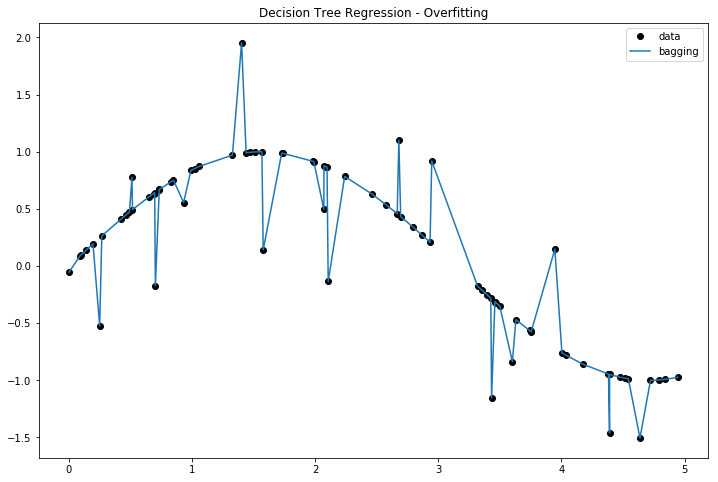

In [66]:
y_over = np.sin(X).ravel()
y_over[::5] += 2 * (0.5 - rng.rand(16))

tree = DecisionTreeRegressor()
tree.fit(X,y_over)
bagging = BaggingRegressor(base_estimator=tree,
                           bootstrap=False,
                           random_state=rng)
bagging.fit(X,y_over)
y_over_bagging = bagging.predict(X)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y_over, 'o', c="k", label="data")
plt.plot(X, y_over_bagging, label="bagging")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression - Overfitting")
plt.legend(loc=1, numpoints=1)
plt.show()

#### 5)

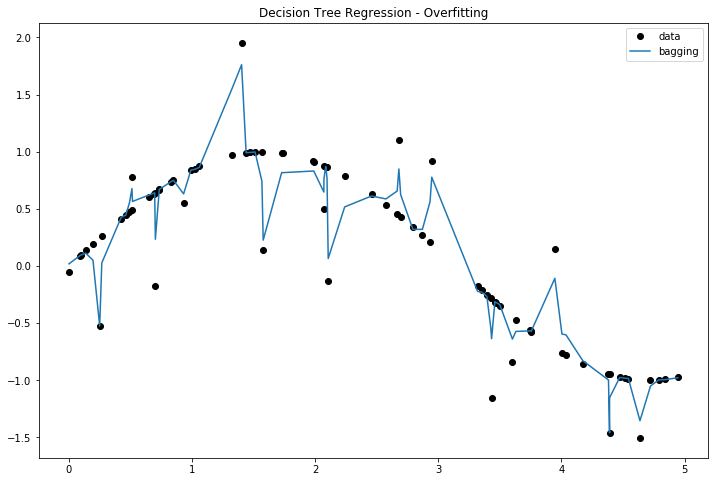

In [67]:
bagging = BaggingRegressor(base_estimator=tree,
                           random_state=rng)
bagging.fit(X,y_over)
y_over_bagging = bagging.predict(X)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y_over, 'o', c="k", label="data")
plt.plot(X, y_over_bagging, label="bagging")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression - Overfitting")
plt.legend(loc=1, numpoints=1)
plt.show()

### Part Ⅱ. Random Forests

#### 6)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
# boston diabetes iris digits: regression regression classification classification

print 'Data Boston'
boston = load_boston()
X_boston, y_boston = boston.data, boston.target
# Regression - boston - RF
estimator = RandomForestRegressor()
score_RFR = cross_val_score(estimator,X_boston,y_boston,cv=7).mean()
print 'score(RFR): ',score_RFR
# Regression - boston - SVM
svr = SVR(kernel='linear')
y_svr = svr.fit(X_boston, y_boston).predict(X_boston)
score_SVM = svr.score(X_boston, y_boston)
print 'Score(SVM): ',score_SVM

print 'Data Diabetes'
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target
# Regression - Diabetes - RF
estimator = RandomForestRegressor()
score_RFR = cross_val_score(estimator,X_diabetes,y_diabetes,cv=7).mean()
print 'score(RFR): ',score_RFR
# Regression - Diabetes - SVM
svr = SVR(kernel='linear')
y_svr = svr.fit(X_diabetes, y_diabetes).predict(X_diabetes)
score_SVM = svr.score(X_diabetes, y_diabetes)
print 'Score(SVM): ',score_SVM

print 'Data Iris'
iris = load_iris()
X_iris, y_iris = iris.data[:,:2], iris.target
print(X_iris.shape)
print(y_iris.shape)
X_train = X_iris[::2]
y_train = y[::2]
X_test = X_iris[1::2]
y_test = y[1::2]
print X_iris
print X_train
print X_test
# # Standardize
# mean = X_iris.mean(axis=0)
# std = X_iris.std(axis=0)
# X_iris = (X_iris - mean) / std
# # Classification - iris - RF
# model = RandomForestClassifier(n_estimators=10)
# # clf = model.fit(X_iris,y_iris)
# score_RFR = cross_val_score(model,X_iris,y_iris,cv=7).mean()
# print 'score(RFR): ',score_RFR
# # Classification - iris - SVM
# svr = SVR(kernel='linear')
# y_svr = svr.fit(X_iris, y_iris).predict(X_iris)
# score_SVM = svr.score(X_iris, y_iris)
# print 'Score(SVM): ',score_SVM

Data Boston
score(RFR):  0.616303815799
Score(SVM):  0.703426158584
Data Diabetes
score(RFR):  0.39006619879
Score(SVM):  0.00732424756005
Data Iris
(150, 2)
(150,)
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 